In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"D:\extra folder\Downloads\dsbda practical\datasets\A2.csv")
df.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100,62,73.0,92.0,96
1,2,Student_2,72,97,82.0,NaN,78
2,3,Student_3,100,88,71.0,99.0,-94
3,4,Student_4,72,99,NaN,84.0,86
4,5,Student_5,97,70,84.0,70.0,86


In [4]:
df.isnull().sum()

Roll No       0
Name          0
Subject 1     0
Subject 2     0
Subject 3     1
Subject 4     1
Attendance    0
dtype: int64

In [5]:
df1=df.copy()
df1=df1.ffill()
df1.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100,62,73.0,92.0,96
1,2,Student_2,72,97,82.0,92.0,78
2,3,Student_3,100,88,71.0,99.0,-94
3,4,Student_4,72,99,71.0,84.0,86
4,5,Student_5,97,70,84.0,70.0,86


In [6]:
df2=df.copy()
df2=df2.bfill()
df2.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100,62,73.0,92.0,96
1,2,Student_2,72,97,82.0,99.0,78
2,3,Student_3,100,88,71.0,99.0,-94
3,4,Student_4,72,99,84.0,84.0,86
4,5,Student_5,97,70,84.0,70.0,86


In [9]:
df3=df.copy()
df3['Subject 3']=df3['Subject 3'].fillna(df3['Subject 3'].mean()) #we can also write median ,mode
df3.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100,62,73.00,92.0,96
1,2,Student_2,72,97,82.00,NaN,78
2,3,Student_3,100,88,71.00,99.0,-94
3,4,Student_4,72,99,79.89,84.0,86
4,5,Student_5,97,70,84.00,70.0,86


In [18]:
df4=df.copy()
df4.dropna(axis=1,inplace=True)
df4.head()

,Roll No,Name,Subject 1,Subject 2,Attendance
0,1,Student_1,100,62,96
1,2,Student_2,72,97,78
2,3,Student_3,100,88,-94
3,4,Student_4,72,99,86
4,5,Student_5,97,70,86


In [29]:
df5=df.copy()
inconsistentdf=df5[df5[['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Attendance']]<0]
print('negative value inconsitency in dataset')
inconsistentdf.head()

negative value inconsitency in dataset


,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-94.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df5 = df5[(df5[['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Attendance']] > 0).any(axis=1)]
df5.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100,62,73.0,92.0,96
1,2,Student_2,72,97,82.0,NaN,78
3,4,Student_4,72,99,NaN,84.0,86
4,5,Student_5,97,70,84.0,70.0,86
5,6,Student_6,98,76,89.0,92.0,82


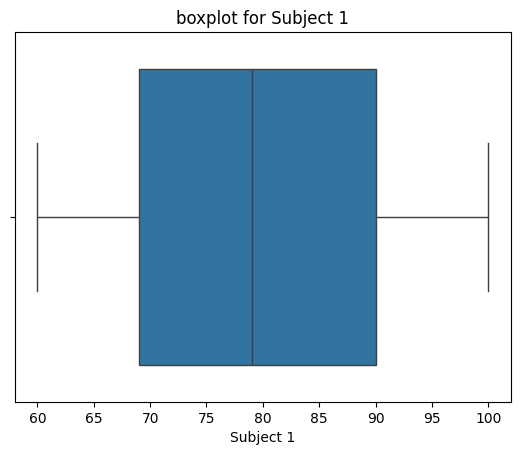

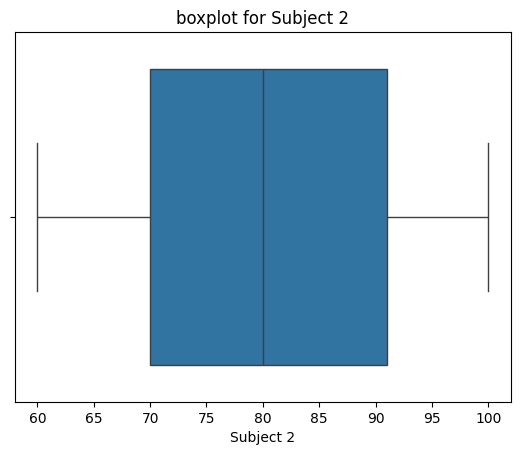

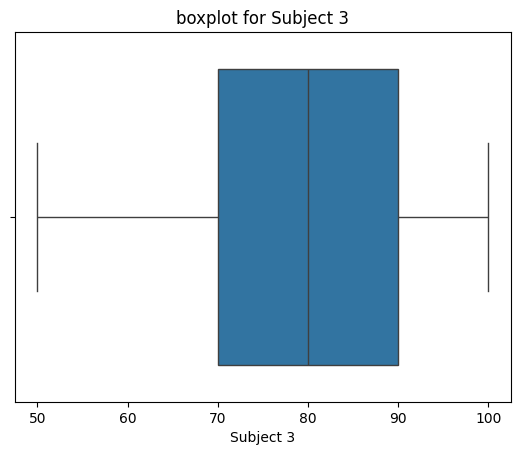

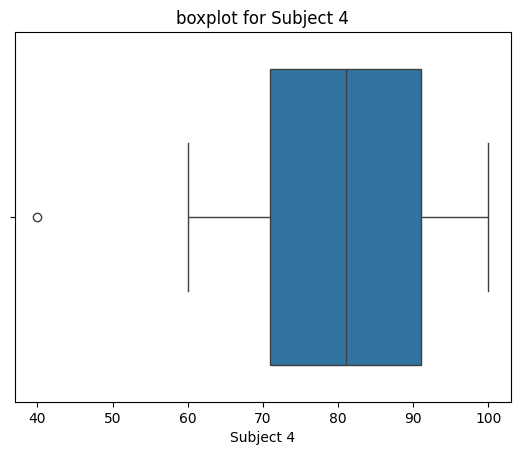

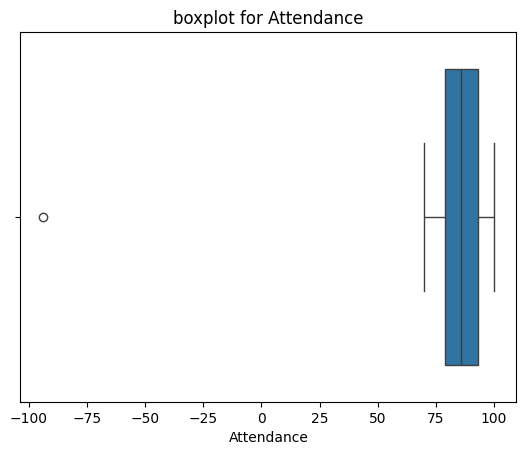

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
nc=['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Attendance']
df6=df.copy()
for c in nc:
    sns.boxplot(x=df6[c])
    plt.title(f'boxplot for {c}')
    plt.show()
    

In [45]:
for c in nc:
    Q1=df6[c].quantile(0.25)
    Q3=df6[c].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    #np.where(condition, value_if_true, value_if_false)
    df6[c]=np.where((df6[c]<lower_bound)|(df6[c]>upper_bound),df6[c].median(),df6[c])


,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100.0,62.0,73.0,92.0,96.0
1,2,Student_2,72.0,97.0,82.0,NaN,78.0
2,3,Student_3,100.0,88.0,71.0,99.0,86.0
3,4,Student_4,72.0,99.0,NaN,84.0,86.0
4,5,Student_5,97.0,70.0,84.0,70.0,86.0


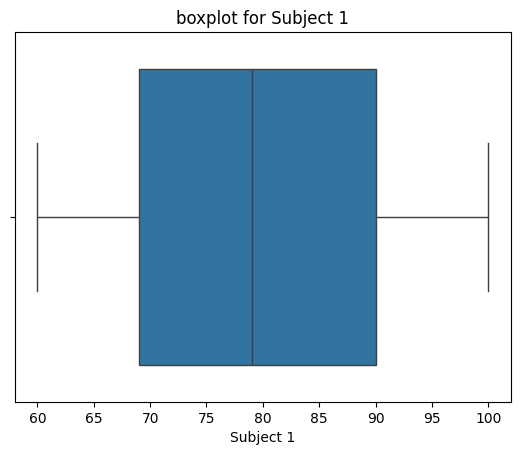

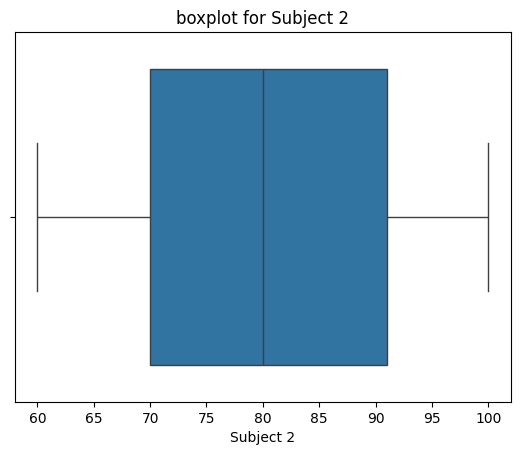

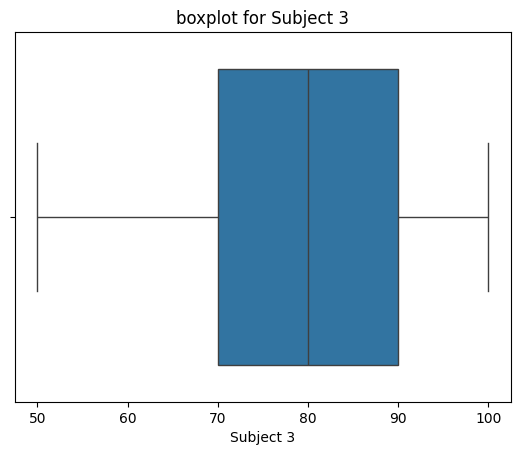

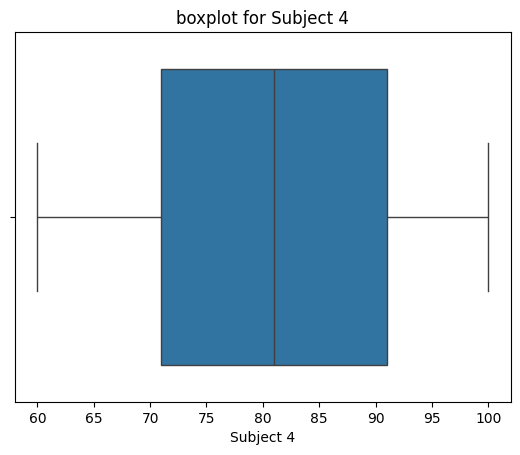

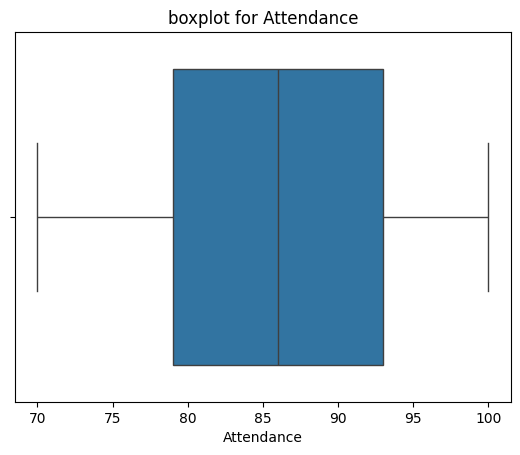

In [47]:
for c in nc:
    sns.boxplot(x=df6[c])
    plt.title(f'boxplot for {c}')
    plt.show()

In [50]:
# Create transformed column
df['log_subject1'] = np.log10(df['Subject 1'] + 1)
df.describe()

,Roll No,Subject 1,Subject 2,Subject 3,Subject 4,Attendance,log_subject1
count,1001.000000,1001.000000,1001.000000,1000.000000,1000.000000,1001.000000,1001.000000
mean,500.000999,79.233766,80.064935,79.890000,80.545000,85.416583,1.899380
std,289.106384,12.085913,11.904318,11.539457,11.793688,10.277319,0.065999
min,1.000000,60.000000,60.000000,50.000000,40.000000,-94.000000,1.785330
25%,250.000000,69.000000,70.000000,70.000000,71.000000,79.000000,1.845098
50%,500.000000,79.000000,80.000000,80.000000,81.000000,86.000000,1.903090
75%,750.000000,90.000000,91.000000,90.000000,91.000000,93.000000,1.959041
max,1000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.004321


<Axes: xlabel='Subject 1', ylabel='Count'>

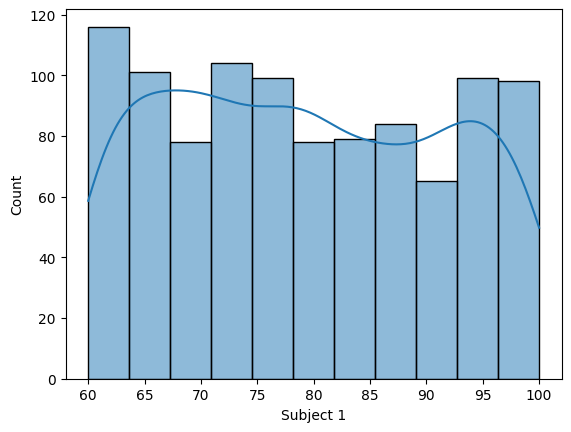

In [59]:
sns.histplot(df['Subject 1'],kde=True)

<Axes: xlabel='log_subject1', ylabel='Count'>

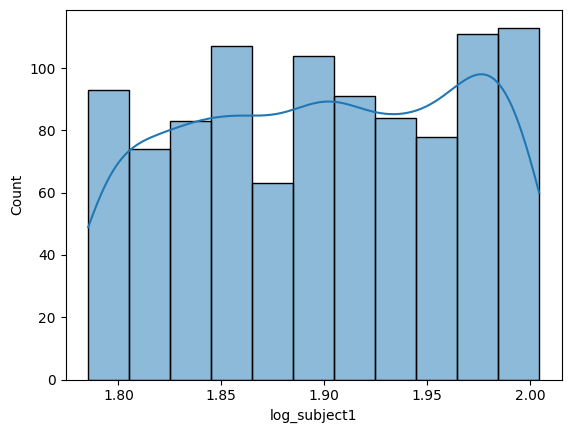

In [60]:
sns.histplot(df['log_subject1'],kde=True)